<a href="https://colab.research.google.com/github/Samir4p/Estudos_Ciencia_Dados/blob/main/BoxPlot_HistoGrama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamas baixar as bibliotecas a serem utilizadas 


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/lucaslattari/HistogramsAndBoxPlots/master/marvel_vs_dc.csv')

df.rename(columns = {'Rate': 'IMDB Score', 'Metascore': 'Metacritic Score'}, inplace=True)

df['IMDB Score'] *= 10
df['IMDB Score'] = df['IMDB Score'].astype(int)
df['Budget'] = df['Budget'].astype(float)

df.drop(df.columns[0], axis = 1, inplace= True)

df.head()

,Original Title,Company,IMDB Score,Metacritic Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,79,79,126,2008,140000000.0,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,67,61,112,2008,150000000.0,55414050,134806913,263427551
2,Iron Man 2,Marvel,70,57,124,2010,200000000.0,128122480,312433331,623933331
3,Thor,Marvel,70,57,115,2011,150000000.0,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,69,66,124,2011,140000000.0,65058524,176654505,370569774


#Histograma


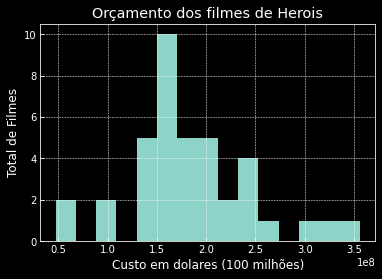

In [18]:
plt.style.use('dark_background')

df['Budget'].plot.hist(bins = 15)

plt.title('Orçamento dos filmes de Herois')
plt.xlabel('Custo em dolares (100 milhões)')
plt.ylabel('Total de Filmes')

plt.show()

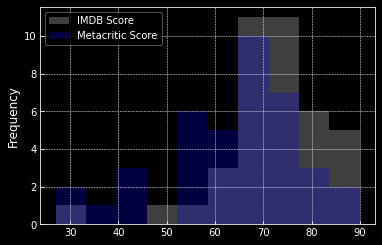

In [19]:
df[['IMDB Score', 'Metacritic Score']].plot.hist(bins = 10, color= ['white', 'blue'], alpha = 0.25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


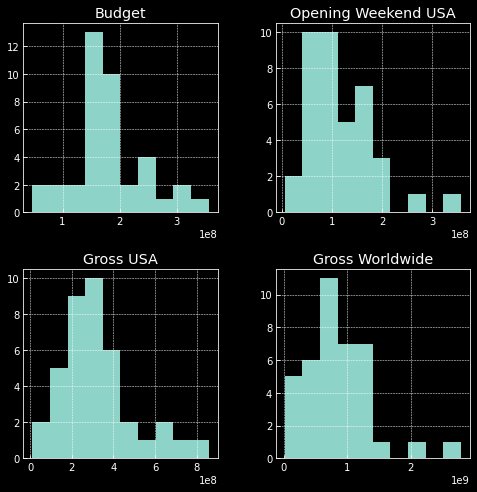

In [20]:
df_money = pd.DataFrame(df, columns= ['Budget','Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide'])

f = plt.figure(figsize= ( 8, 8))
ax = f.gca()

df_money.hist(ax = ax)

plt.show()

#BoxPlot

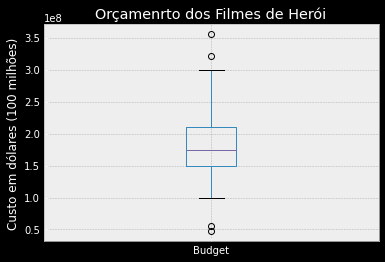

In [21]:
plt.style.use('bmh')

df['Budget'].plot.box(grid = True)

plt.title('Orçamenrto dos Filmes de Herói')
plt.ylabel('Custo em dólares (100 milhões)')

plt.show()

In [22]:
df.describe().astype(int)

,IMDB Score,Metacritic Score,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
count,39,39,39,39,39,39,39
mean,72,63,2013,184102564,115109770,323265922,827572676
std,10,13,4,64410196,68667078,180708575,533231804
min,33,27,2004,47000000,5379365,10547117,10903312
25%,69,56,2011,150000000,65390931,203221666,484319291
50%,73,67,2015,175000000,96202337,318604126,746846894
75%,78,72,2017,210000000,155922453,408549171,1104658040
max,90,88,2019,356000000,357115007,858373000,2797800564


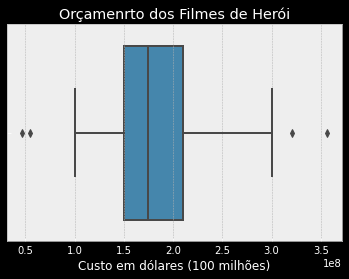

In [24]:
sns.boxplot(x = df['Budget'])

plt.title('Orçamenrto dos Filmes de Herói')
plt.xlabel('Custo em dólares (100 milhões)')

plt.show()

In [26]:
## Vamos descobrir os filmes com min valor
is_min_outlier = df['Budget'] < 1000000000

#Montamos um DatafRame mostrando as informações
df[is_min_outlier]

,Original Title,Company,IMDB Score,Metacritic Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
28,Jonah Hex,DC,47,33,81,2010,47000000.0,5379365,10547117,10903312
38,Joker,DC,87,59,122,2019,55000000.0,96202337,333204580,1060504580


In [28]:
#Vamos descobri os filmes com max valores
is_max_outlier = df['Budget'] > 300000000
##Montando um DataFrame com essas informações
df[is_max_outlier]

,Original Title,Company,IMDB Score,Metacritic Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
18,Avengers: Infinity War,Marvel,85,68,149,2018,321000000.0,257698183,678815482,2048359754
21,Avengers: Endgame,Marvel,85,78,181,2019,356000000.0,357115007,858373000,2797800564


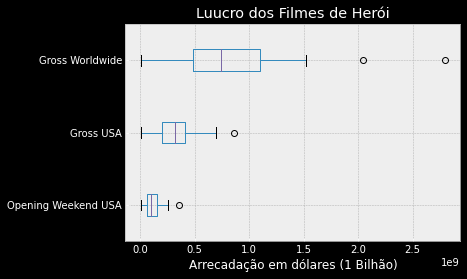

In [35]:
df[['Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide']].boxplot(vert = False)

plt.title('Luucro dos Filmes de Herói')
plt.xlabel('Arrecadação em dólares (1 Bilhão)')

plt.show()


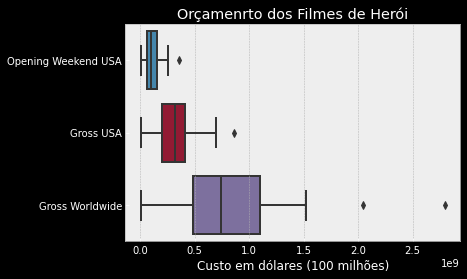

In [37]:
## Utilizando a Biblioteca Seaborn para gerar plots 
sns.boxplot(data = df[['Opening Weekend USA', 'Gross\xa0USA','Gross Worldwide']], orient = 'h')

plt.title('Orçamenrto dos Filmes de Herói')
plt.xlabel('Custo em dólares (100 milhões)')
##Esse recurso serve para retira as escritas dos plots
plt.show()

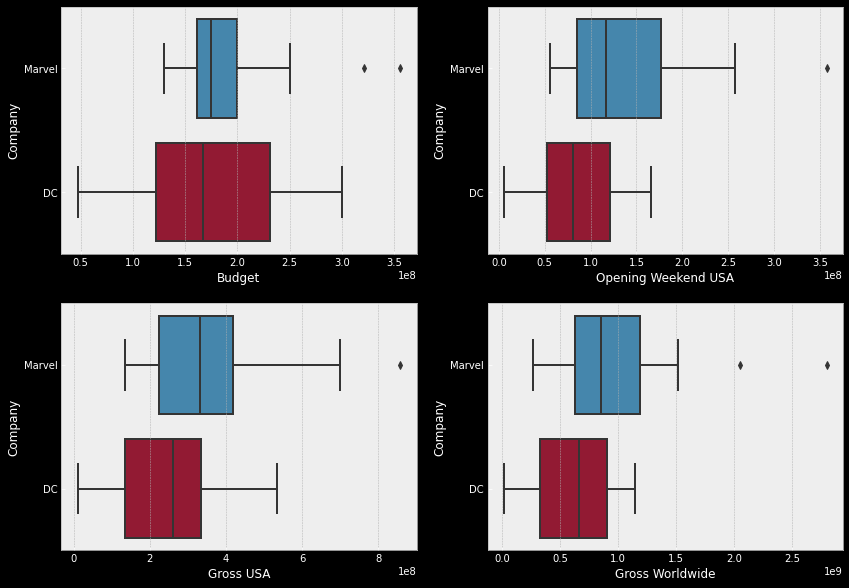

In [41]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

sns.boxplot(x= 'Budget', y= 'Company', data = df, ax = axes[0, 0])
sns.boxplot(x= 'Opening Weekend USA', y= 'Company', data = df, ax = axes[0, 1])
sns.boxplot(x= 'Gross\xa0USA', y= 'Company', data = df, ax = axes[1, 0])
sns.boxplot(x= 'Gross Worldwide', y= 'Company', data = df, ax = axes[1, 1])
